In [46]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt



import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np

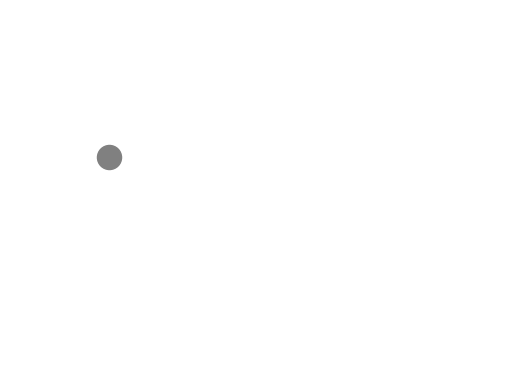

In [70]:
G = nx.Graph()
G.add_node("A")

pos = {
    "A": np.array([-.6,0.2]),
}


fig, ax = plt.subplots()

nx.draw(G, pos = pos, ax = ax, node_color = ["gray"])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# ax.axis("on")
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()




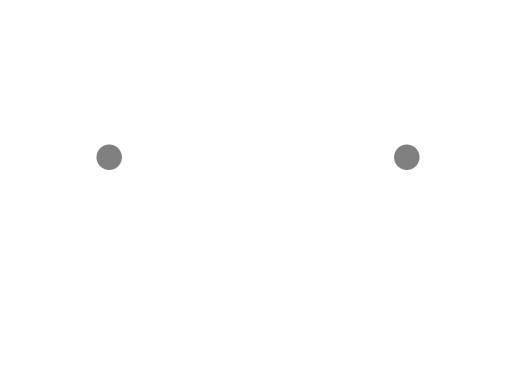

In [71]:
G = nx.Graph()
G.add_node("A")
G.add_node("B")

pos = {
    "A": np.array([-.6,0.2]),
    "B": np.array([.6,0.2]),
}


fig, ax = plt.subplots()

nx.draw(G, pos = pos, ax = ax, node_color = ["gray","gray"])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# ax.axis("on")
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

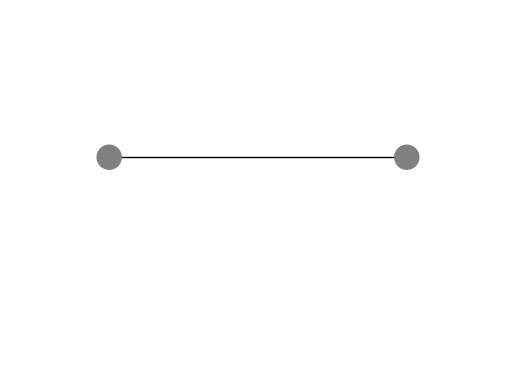

In [72]:
G = nx.Graph()
G.add_node("A")
G.add_node("B")
G.add_edge("A","B")

pos = {
    "A": np.array([-.6,0.2]),
    "B": np.array([.6,0.2]),
}


fig, ax = plt.subplots()

nx.draw(G, pos = pos, ax = ax, node_color = ["gray","gray"])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# ax.axis("on")
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [85]:
from models.layers.layers import EctConfig, EctLayer
from torch_geometric.data import Data, Batch

NUM_THETAS = 128

V = torch.vstack(
    [
        torch.sin(torch.linspace(0, 2*torch.pi, NUM_THETAS)),
        torch.cos(torch.linspace(0, 2*torch.pi, NUM_THETAS)),
    ]
)


points_0 = torch.tensor([[-.6,0.2]])
points_1 = torch.tensor([[-.6,0.2],[.6,.2]])
points_2 = torch.tensor([[-.6,0.2],[.6,.2]])
edges = torch.tensor([[0],[1]])
layer = EctLayer(EctConfig(device="cpu",num_features=2,bump_steps=NUM_THETAS),fixed=True)
layer_edge = EctLayer(EctConfig(device="cpu",num_features=2,bump_steps=NUM_THETAS,num_thetas=NUM_THETAS,ect_type="edges"),fixed=True)
layer.v = V
layer_edge.v = V



batch = Batch.from_data_list([Data(x=points_0),Data(x=points_1),Data(x=points_2,edge_index=edges)])
batch_edge = Batch.from_data_list([Data(x=points_2,edge_index=edges)])
res = layer(batch)

res_edge=layer_edge(batch_edge)

(-0.5, 127.5, 127.5, -0.5)

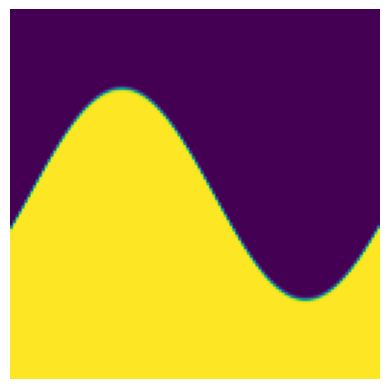

In [86]:
plt.imshow(res[0].detach().numpy())
plt.axis("off")


(-0.5, 127.5, 127.5, -0.5)

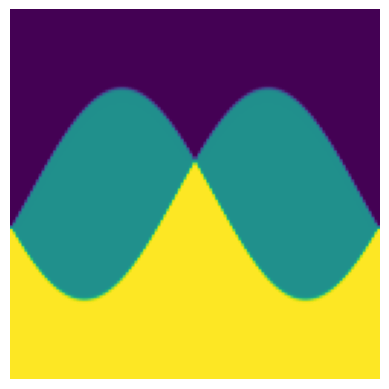

In [87]:
plt.imshow(res[1].detach().numpy())
plt.axis("off")


(-0.5, 127.5, 127.5, -0.5)

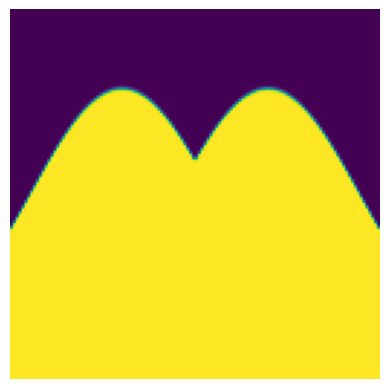

In [88]:
plt.imshow(res_edge[0].detach().numpy())
plt.axis("off")

In [84]:
res_edge[0].shape

torch.Size([128, 256])